In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import accuracy_score,precision_score,classification_report,f1_score,recall_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv(r"C:\Users\SURAJ\Downloads\Heart (1).csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


* MaxHR: maximum Heart Rate
* Thal : Thalassema ()

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["AHD"] = le.fit_transform(df["AHD"])

In [4]:
new_df = df[["Age","Sex","RestBP","Chol","MaxHR","AHD"]]
new_df.head()

,Age,Sex,RestBP,Chol,MaxHR,AHD
0,63,1,145,233,150,0
1,67,1,160,286,108,1
2,67,1,120,229,129,1
3,37,1,130,250,187,0
4,41,0,130,204,172,0


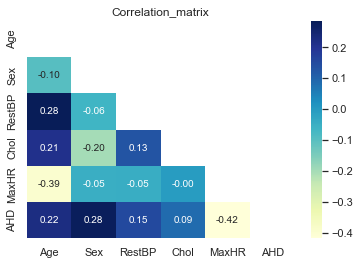

In [5]:


import pandas as pd
import seaborn as sns
import numpy as np
# Calculate the correlation matrix
corr_matrix = new_df.corr(method='pearson')
# Create the correlation matrix plot
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', mask=mask)
plt.title("Correlation_matrix")

plt.show()

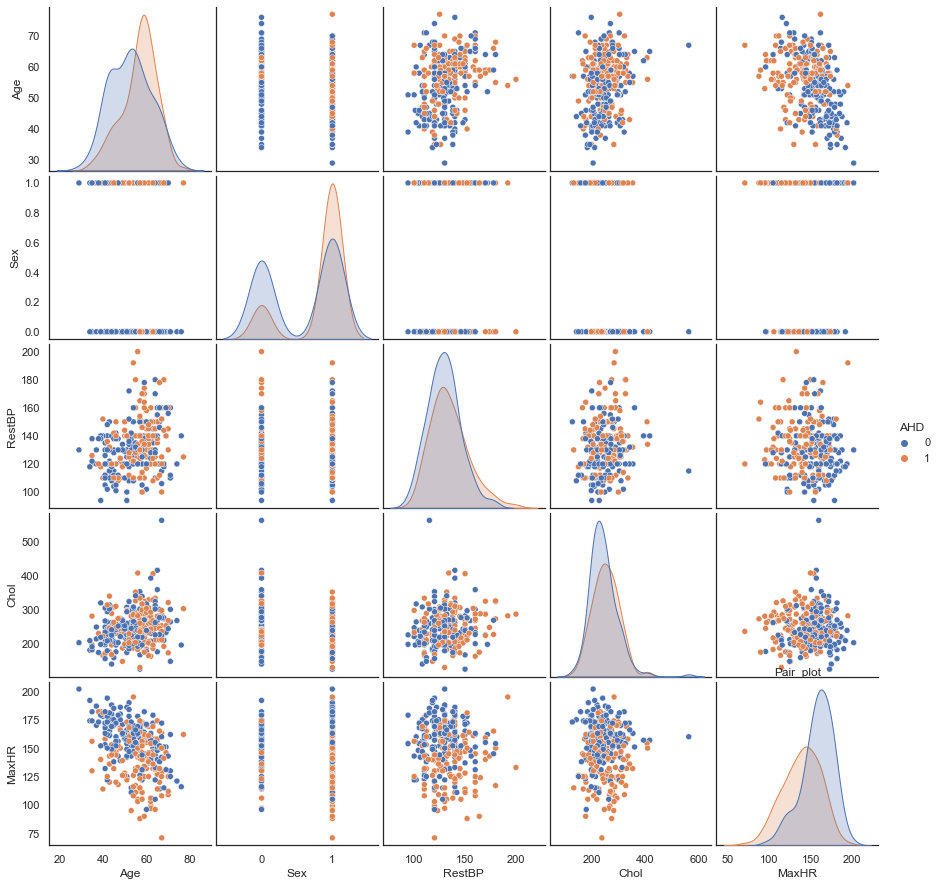

In [6]:
sns.pairplot(new_df,hue="AHD")
plt.title("Pair_plot")
plt.show(sns)

In [7]:
X= new_df.drop("AHD",axis=1)
Y =new_df["AHD"] 
X_train,X_test,y_train,y_test=tts(X,Y,train_size=0.9,random_state=1)
print("Train_shape:" ,X_train.shape)
print("test_shape:",X_test.shape)

Train_shape: (272, 5)
test_shape: (31, 5)


# Logistic regression

Coefficient: [[ 0.01811028  1.64097298  0.01830646  0.00611179 -0.04184049]]
intercepts :  [0.0935658]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.65      0.85      0.73        13

    accuracy                           0.74        31
   macro avg       0.75      0.76      0.74        31
weighted avg       0.77      0.74      0.74        31

----------------------------------------------------------------------------------------------------


Text(30.5, 0.5, 'Actual')

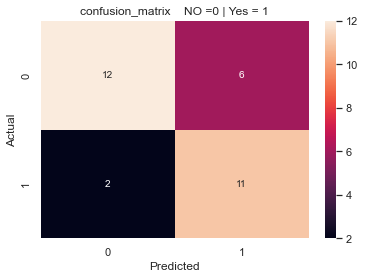

In [8]:
log_re = LogisticRegression()
model =log_re.fit(X_train,y_train)
print("Coefficient:", model.coef_)
print("intercepts : ",model.intercept_)
print("-"*100)
print(classification_report(y_test,model.predict(X_test)))
print("-"*100)
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True)

plt.title("confusion_matrix    NO =0 | Yes = 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")

* Patients actual having heart diseases but model predicted heart diseases : 2 (FN)-Type-II error 
* Patients actual having heart diseases but model predicted they don't have heart diseases  : 6 (FP)-Type-I error 
* In this case Type-II error is more dangerous


# Scaling the data 
    * to increase the accuracy

In [9]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

Coefficient: [[ 0.13885536  0.81194403  0.29517356  0.31070506 -0.98009524]]
intercepts :  [-0.18243921]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.77      0.77      0.77        13

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

----------------------------------------------------------------------------------------------------


Text(30.5, 0.5, 'Actual')

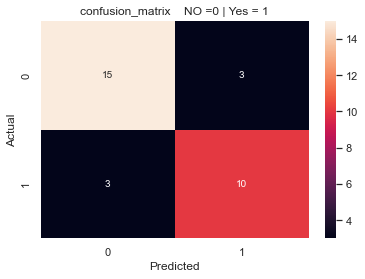

In [10]:
log_re = LogisticRegression()
model1 =log_re.fit(X_train_scaled,y_train)
print("Coefficient:", model1.coef_)
print("intercepts : ",model1.intercept_)
print("-"*100)
print(classification_report(y_test,model1.predict(X_test_scaled)))
print("-"*100)
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test_scaled)),annot=True)

plt.title("confusion_matrix    NO =0 | Yes = 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")

* Since the Type-II & Type-I error is same we focus on F1_score
* & the data is unbalanced so we select wrightd avg score for F1_score (0.81)

# --------
    * from both scaled & unscaled we prefer unscaled bocz Type-II error is less (2)

<AxesSubplot: xlabel='AHD'>

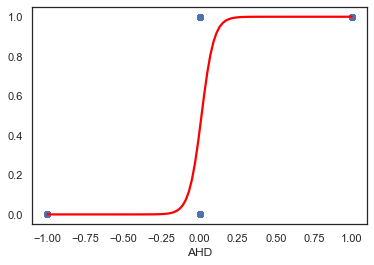

In [11]:

sns.regplot((model.predict(X_train)-(y_train)),model.predict(X_train),logistic=True,ci=True,
            line_kws={"color":'red'})

* ROC (Receiver Operating Characteristic)
* AOC (Area Under the Curve)

Text(0.5, 1.0, 'ROC_curve')

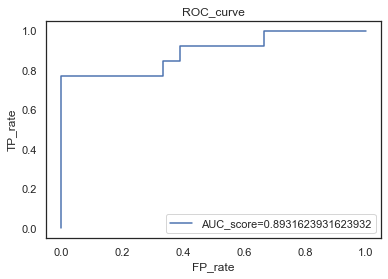

In [18]:
import sklearn.metrics as smt 
y_pred_prob =model.predict_proba(X_test)[::,1]
fpr,tpr,_ =smt.roc_curve(y_test,y_pred_prob)
roc_score=smt.roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="AUC_score="+str(roc_score))
plt.xlabel("FP_rate")
plt.ylabel("TP_rate")
plt.legend(loc=4)
plt.title("ROC_curve")

Text(0.5, 1.0, 'Sigmoid_Curve')

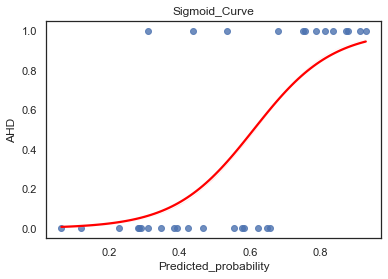

In [16]:
y_pred_prob =model.predict_proba(X_test)[::,1]
sns.regplot(y_pred_prob,y_test,logistic=True,ci=True,
            line_kws={"color":'red'})
plt.xlabel("Predicted_probability")
plt.title("Sigmoid_Curve")